<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/FSR/blob/master/IDDLO-29-20/Notebooks/Ensemble_Learning.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
#BOUT Nassim

# Ensemble Learning

In [2]:
!pip install sklearn

In [3]:
import sys
import sklearn
import numpy as np
import os

np.random.seed(42)
random_state = 42

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Make_moons Data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state = random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
X.shape

(500, 2)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

## Decision Trees

In [6]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.856


In [7]:
!pip install graphviz

In [7]:
from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
        tree_clf,
        out_file=None, 
        feature_names=["x1", "x2"],
        class_names=["yellow", "blue"],
        rounded=True,
        filled=True
    )

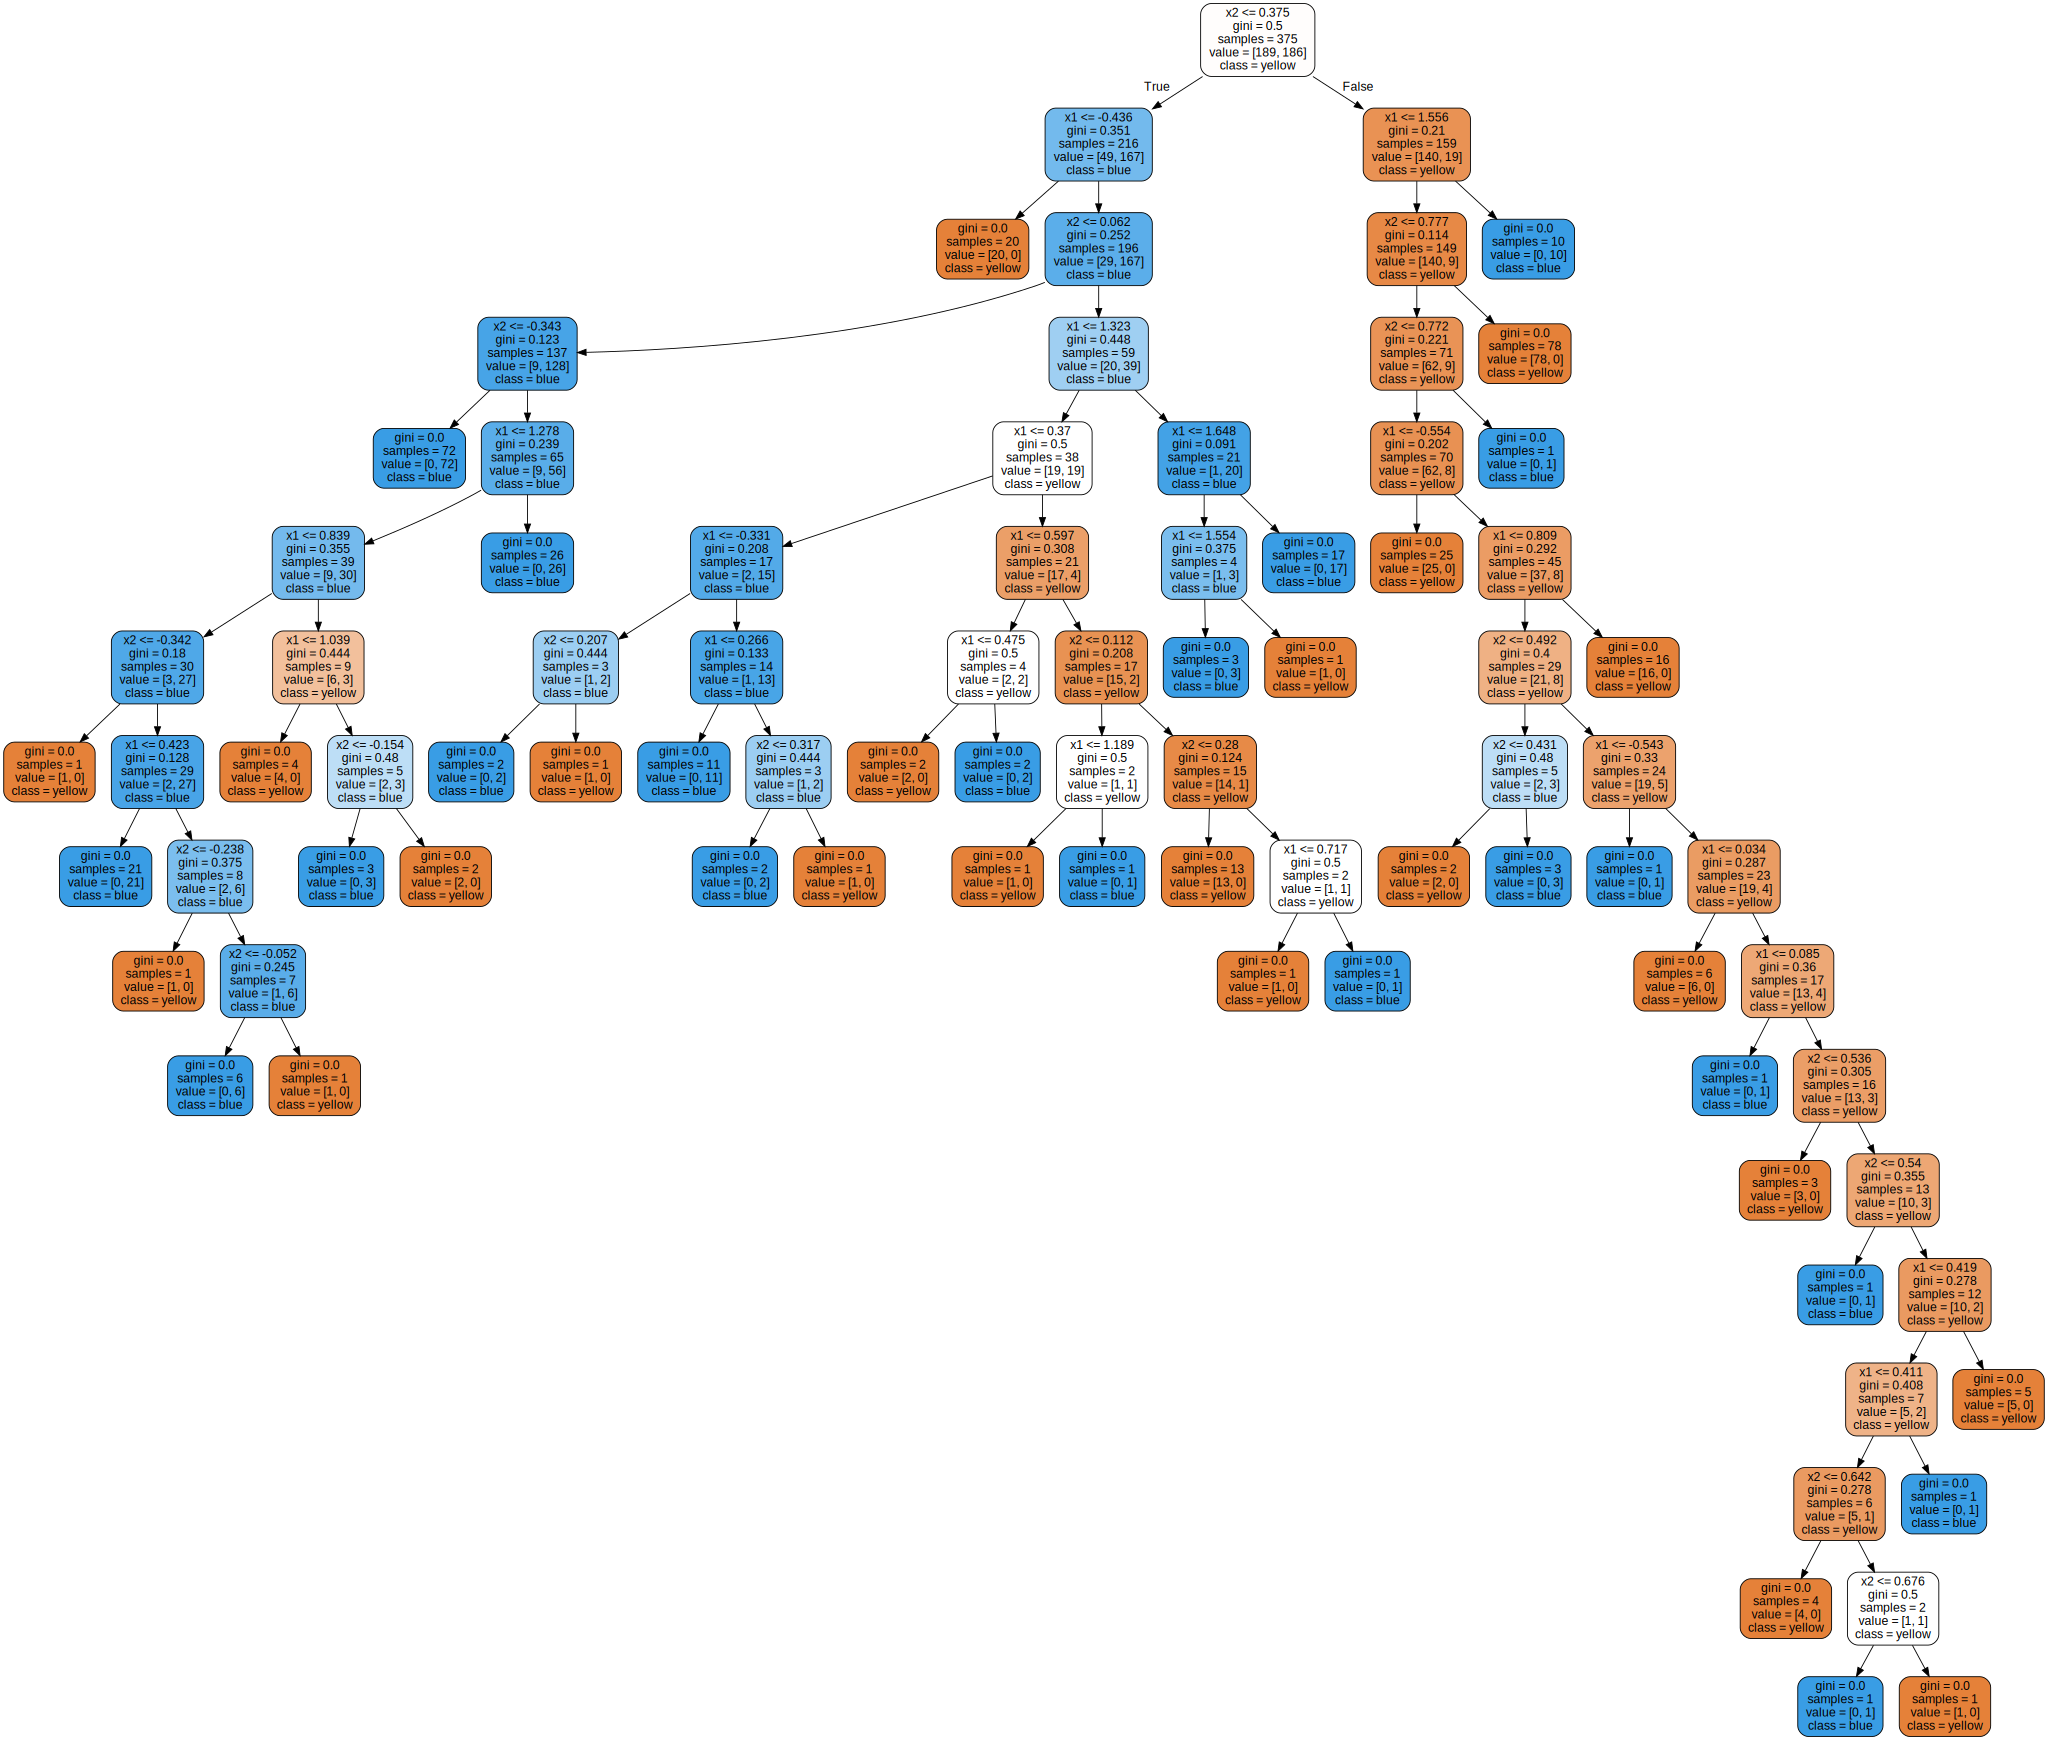

In [9]:
graph = Source(dot_data)
graph  

## Bagging

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.904


## Random Forest

In [11]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.904


In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

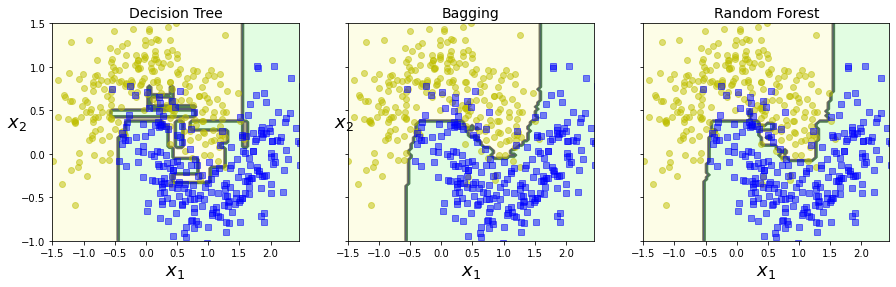

In [13]:
fix, axes = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Bagging", fontsize=14)
plt.sca(axes[2])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest", fontsize=14)
plt.ylabel("")
plt.show()

## Voting 

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state = random_state)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state = random_state)
svm_clf = SVC(gamma="scale", probability=True, random_state = random_state)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state = random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)

In [16]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [17]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


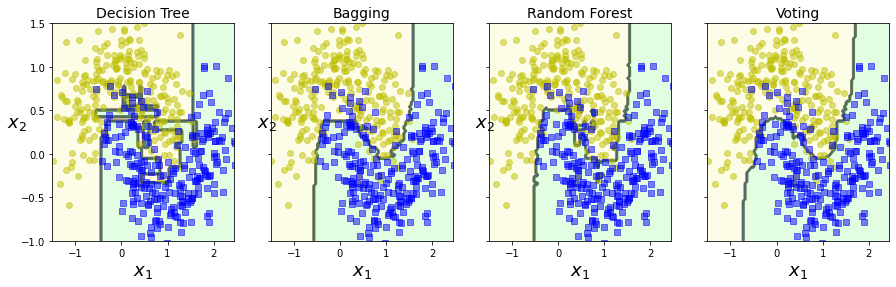

In [18]:
fix, axes = plt.subplots(ncols=4, figsize=(15,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Bagging", fontsize=14)
plt.sca(axes[2])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest", fontsize=14)
plt.sca(axes[3])
plot_decision_boundary(voting_clf, X, y)
plt.title("Voting", fontsize=14)
plt.ylabel("")
plt.show()

## SVC with Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30.],
         'gamma': [0.01, 0.03, 0.1]},
    ]

svm_clf = SVC()
svm_grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1', verbose=2)
svm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] ...........

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0],
                          'gamma': [0.01, 0.03, 0.1], 'kernel': ['rbf']}],
             scoring='f1', verbose=2)

In [20]:
svm_grid_search.best_score_

0.8901596789815969

In [21]:
svm_grid_search.best_params_

{'C': 30.0, 'gamma': 0.1, 'kernel': 'rbf'}